<a href="https://colab.research.google.com/github/JabesNestor/proyecto/blob/main/crime_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Aprendizaje Supervisado para Predicción de Robos


# Fuente de los datos
> Los datos utilizados en este proyecto fueron obtenidos de la Sociedad Dominicana de Ciencia de Datos y Big Data. Los datos públicos están disponibles en el siguiente enlace:
https://bigdatado.org/download/crime-data/



# Introducción
####En este análisis, aplicamos técnicas de aprendizaje supervisado para predecir robos utilizando un dataset que contiene información temporal sobre incidentes reportados. El objetivo es construir un modelo que pueda predecir con precisión la ocurrencia de robos basándose en características derivadas de la fecha y hora del incidente.

# Importamos librerias necesarias para el análisis exploratorio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Carga y Exploración de Datos

In [ ]:
df = pd.read_csv("/content/crime_data.csv")

In [ ]:
df.head()

,X,Y,DATETIME,TARGET
0,-76.624824,39.252974,2018-04-02 04:00:00+00:00,ASALTO
1,-76.592225,39.343284,2019-02-01 08:00:00+00:00,HURTO
2,-76.625705,39.284369,2017-09-27 21:00:00+00:00,HURTO
3,-76.478282,39.270194,2017-03-21 11:00:00+00:00,FALSO
4,-76.576006,39.291228,2017-03-07 02:00:00+00:00,ROBO


In [ ]:
df.tail()

,X,Y,DATETIME,TARGET
236365,-76.614490,39.277099,2017-01-21 11:00:00+00:00,HURTO
236366,-76.560945,38.734335,2017-10-02 18:00:00+00:00,FALSO
236367,-76.597153,39.234203,2017-08-06 11:00:00+00:00,HURTO
236368,-76.640145,39.308469,2019-01-06 12:00:00+00:00,HURTO
236369,-76.608258,39.312723,2019-07-07 11:00:00+00:00,ASALTO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236370 entries, 0 to 236369
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   X         236370 non-null  float64
 1   Y         236370 non-null  float64
 2   DATETIME  236370 non-null  object 
 3   TARGET    236370 non-null  object 
dtypes: float64(2), object(2)
memory usage: 7.2+ MB


# Comprobar si hay valores nulos

In [ ]:
df.isnull().sum() #check for null values

X           0
Y           0
DATETIME    0
TARGET      0
dtype: int64

# Cuales son los crimenes mas frecuentes

In [ ]:
df.TARGET.value_counts()

TARGET
HURTO     92440
ASALTO    69438
ROBO      51282
FALSO     23210
Name: count, dtype: int64

In [ ]:
targesito = df.TARGET.value_counts().sort_values()
print("Nombre de las colm:", targesito.index)
print("Valores:",targesito.values)

Nombre de las colm: Index(['FALSO', 'ROBO', 'ASALTO', 'HURTO'], dtype='object', name='TARGET')
Valores: [23210 51282 69438 92440]


# Visualizacion de los datos

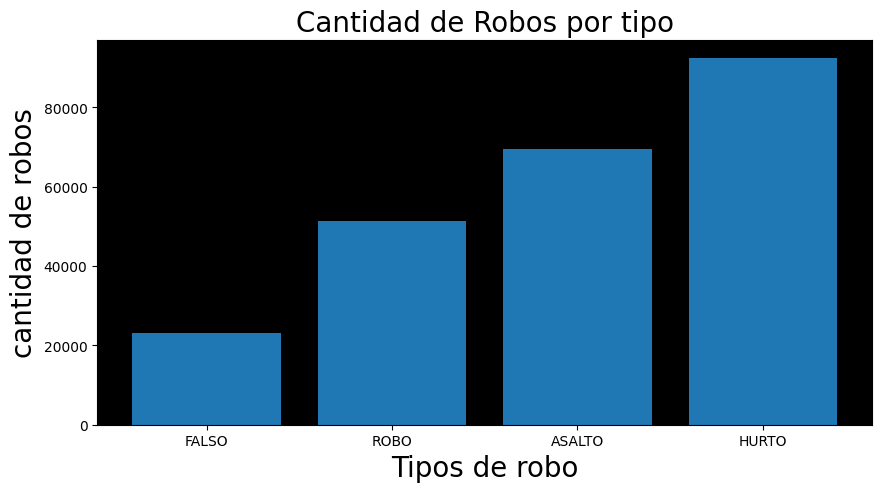

In [ ]:
targesito = df.TARGET.value_counts().sort_values()
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(targesito.index, targesito.values)
ax.set_facecolor("black")
plt.style.use("dark_background")
plt.xticks(rotation = 0)
plt.xlabel("Tipos de robo", fontsize = 20)
plt.ylabel("cantidad de robos", fontsize = 20)
plt.title("Cantidad de Robos por tipo", fontsize = 20)
plt.show()

## COMO HA SIDO LAS TENDECIAS DE ROBO A LO LARGO DEL TIEMPO


### Transformación de Datos
Realizamos transformaciones necesarias para extraer características adicionales y limpiar los datos.

In [ ]:
from datetime import datetime

In [ ]:
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

In [ ]:
df['DAY'] = df['DATETIME'].dt.day
df['YEAR'] = df['DATETIME'].dt.year
df['HOUR'] = df['DATETIME'].dt.hour
df['MONTH'] = df['DATETIME'].dt.month
df['HOUR'] = df['DATETIME'].dt.hour
df['DAYOFWEEK'] = df['DATETIME'].dt.dayofweek

In [ ]:
robos = df[df['TARGET'].isin(['ROBO', 'HURTO', 'ASALTO'])]

# Visualización de Robos por Año

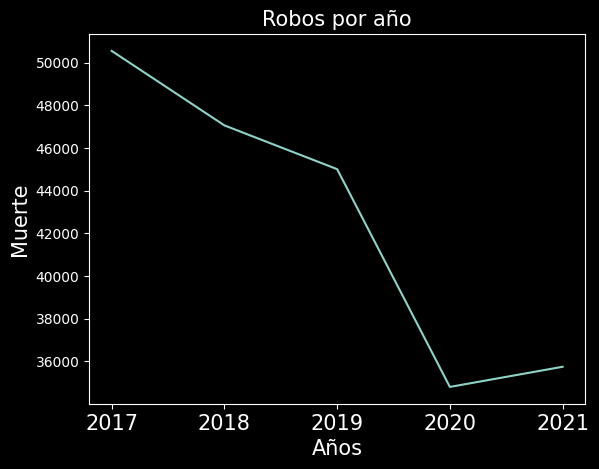

In [ ]:
year_counts = robos['YEAR'].value_counts().sort_index()
#grafica
plt.plot(year_counts)
plt.style.use("dark_background")
plt.xticks(year_counts.index, fontsize= 15)
plt.xlabel('Años', fontsize = 15)
plt.ylabel('Muerte', fontsize= 15)
plt.title('Robos por año', fontsize= 15)
plt.show()

In [ ]:
print('Numeros')
print(robos['YEAR'].value_counts())
print('Shape',robos['YEAR'].shape)

Numeros
YEAR
2017    50556
2018    47062
2019    45009
2021    35739
2020    34794
Name: count, dtype: int64
Shape (213160,)


**Análisis de la Tendencia de Criminalidad**


---


>La gráfica de serie de tiempo revela una tendencia significativa en la incidencia delictiva a lo largo de los años analizados. Desde 2017 hasta 2021, se observa una notable disminución en el número de delitos reportados, reflejando una tendencia a la baja en la criminalidad.

>En el año 2017, se registraron 50,556 delitos, cifra que se redujo a 47,062 en 2018 y a 45,009 en 2019. Sin embargo, el año 2020 marcó un punto destacado con tan solo 34,794 delitos reportados, marcando un mínimo durante el periodo estudiado. Este descenso pronunciado podría atribuirse en gran medida a la pandemia de COVID-19, que afectó significativamente la movilidad y las actividades sociales.

>El año 2021, en contraste, mostró un ligero incremento en la incidencia delictiva, alcanzando los 35,739 delitos. Este aumento podría interpretarse como una recuperación gradual tras la disminución drástica observada durante el año anterior, posiblemente debido a la relajación de las restricciones asociadas al COVID-19.

**Conclusiones y Factores Influyentes**

>Es evidente que el contexto del COVID-19 tuvo un impacto notable en los niveles de criminalidad, con una marcada disminución en 2020 y un repunte leve en 2021.



#### Podemos ver que los robos bajaron en el 2020 por culpa del covid 19

## Matriz de correlacion y histograma

In [ ]:
#matriz de correlacion

In [ ]:
df_num = df.select_dtypes(include = ['int64', 'float64'])
df_num.corr()

,X,Y
X,1.000000,-0.154367
Y,-0.154367,1.000000


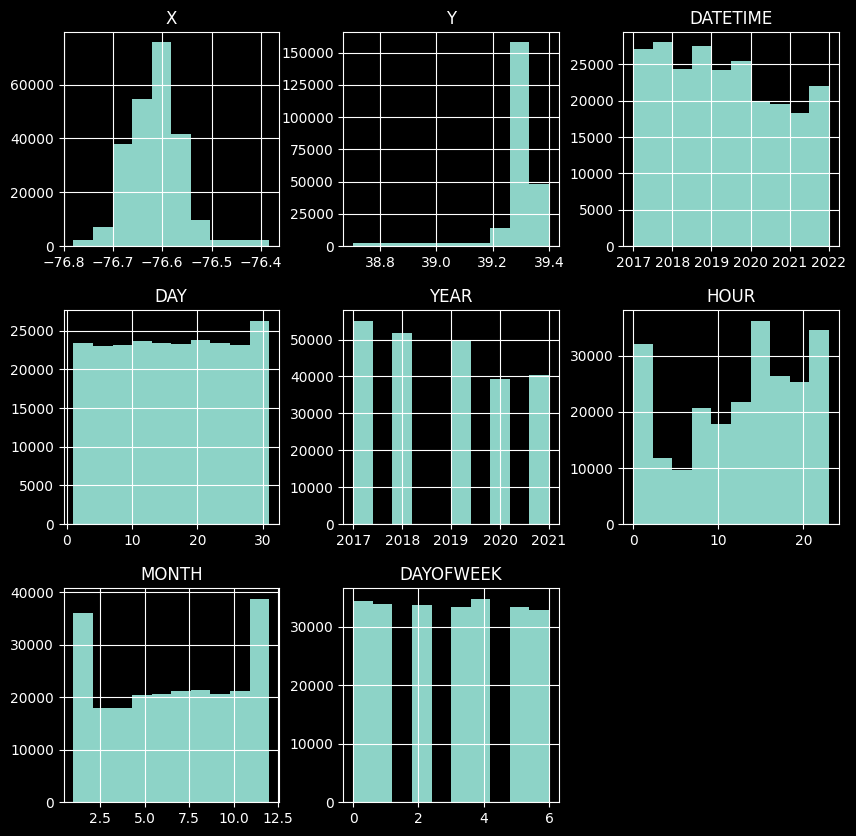

In [ ]:
df.hist(figsize = (10, 10))
plt.show()

## Normalizacion de la distribución de `df[Y], df[X] `




In [ ]:
# Normalizar la distribucion de Y
print("Skewness: %f" % df['X'].skew())
print("Skewness: %f" % df['Y'].skew())

Skewness: 0.621169
Skewness: -3.593096


Análisis de Asimetría de Variables


---


Se calculó la medida de asimetría (skewness) para las variables X e Y del conjunto de datos.


*   X presenta una ligera asimetría positiva, con un valor de skewness de 0.62
*  Y presenta una asimetría negativa, con un valor de skewness de -3.59.



# Construcción y Entrenamiento del Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X_clean' is not defined

In [ ]:
X = df[['X', 'Y', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'DAYOFWEEK']]
y = df['TARGET']

In [ ]:
print(X.isna().sum())

X            0
Y            0
YEAR         0
MONTH        0
DAY          0
HOUR         0
DAYOFWEEK    0
dtype: int64


In [ ]:
X_clean = X.dropna()
y_clean = y[X_clean.index]

In [ ]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

NameError: name 'X_train' is not defined

## Vemos las caracteristicas mas importantes

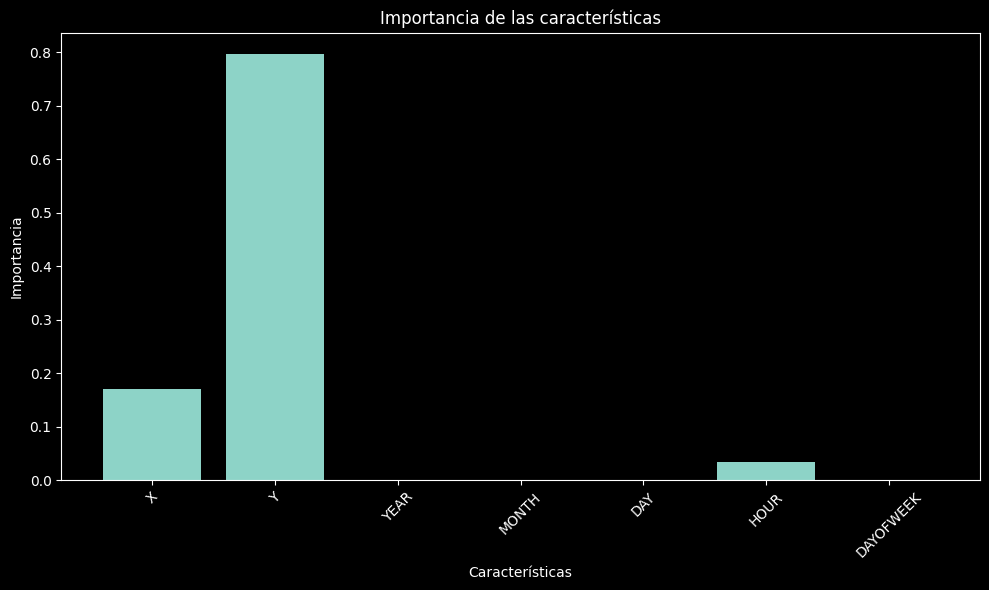

In [ ]:
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
feature_names = X_clean.columns

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title("Importancia de las características")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos ver que las caracteristicas mas importantes son `[Y] ` seguida de `[X]`

## Decision Tree Classification

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.48756187333417944

Informe de clasificación:
              precision    recall  f1-score   support

      ASALTO       0.39      0.16      0.23     13881
       FALSO       0.99      0.89      0.94      4695
       HURTO       0.45      0.91      0.60     18392
        ROBO       0.00      0.00      0.00     10306

    accuracy                           0.49     47274
   macro avg       0.46      0.49      0.44     47274
weighted avg       0.39      0.49      0.39     47274



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

Accuracy: 0.48756187333417944

Informe de clasificación:
              precision    recall  f1-score   support

      ASALTO       0.39      0.16      0.23     13881
       FALSO       0.99      0.89      0.94      4695
       HURTO       0.45      0.91      0.60     18392
        ROBO       0.00      0.00      0.00     10306

    accuracy                           0.49     47274
   macro avg       0.46      0.49      0.44     47274
weighted avg       0.39      0.49      0.39     47274



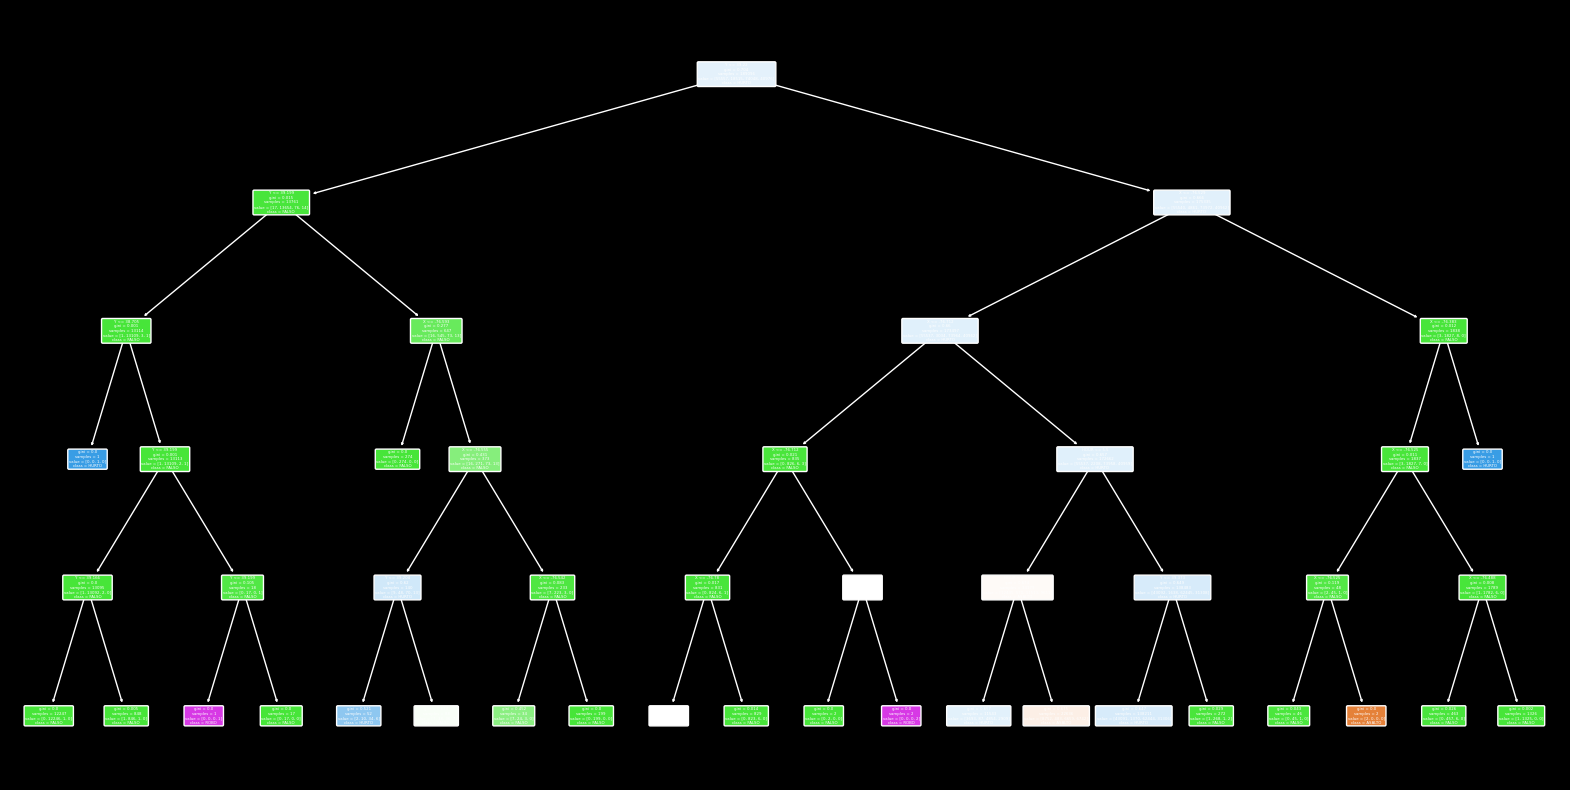

In [ ]:
# Grafica de el Decision Tree Classification
# por curiosidad
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=list(X_clean.columns), class_names=model.classes_, filled=True, rounded=True)
plt.show()

# Mapa de calor

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


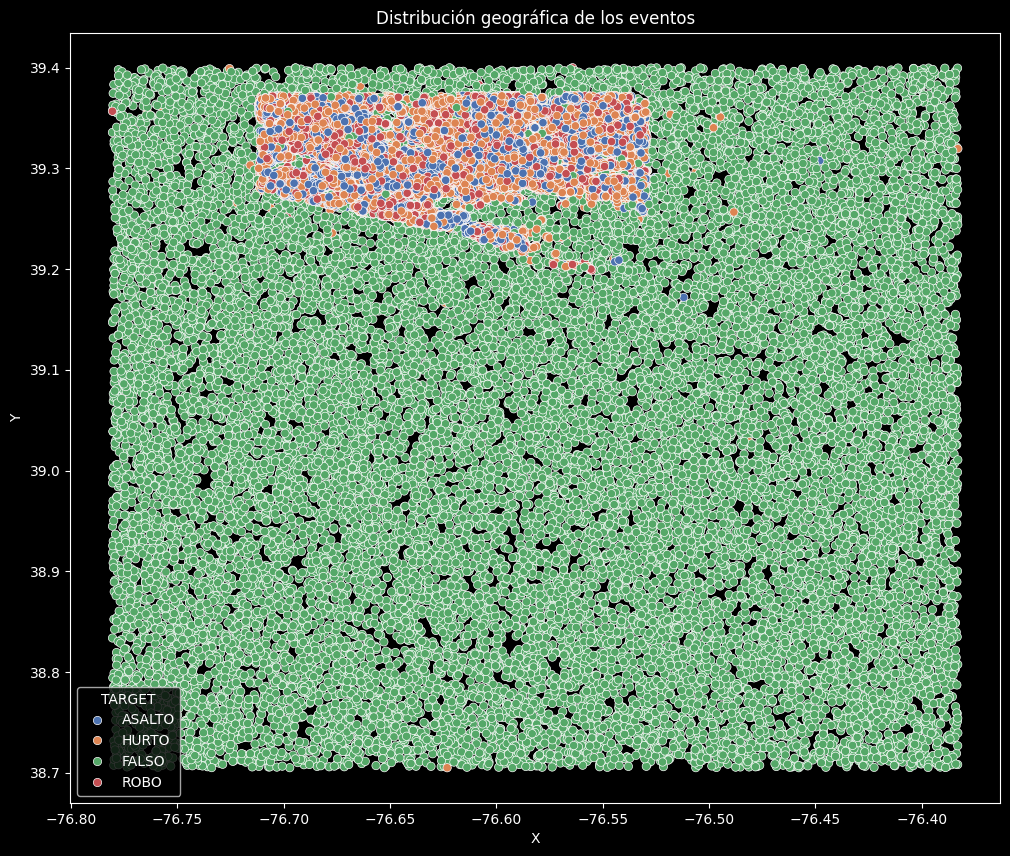

In [ ]:

plt.figure(figsize=(12, 10))
sns.scatterplot(data=X_clean, x='X', y='Y', hue=y_clean, palette='deep')
plt.title('Distribución geográfica de los eventos')
plt.show()


# Evaluación del Modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.5420738672420358


#### El modelo actual de Random Forest tiene una precisión de 54.21%.
